In [92]:
%pylab inline

import fiona
import geopandas as gpd
import pandas as pd
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [93]:
print(gpd.__version__)
print(fiona.__version__)
print(gdal.__version__)

0.1.1
1.6.0
2.0.0


In [94]:
# Read in attribute tables
#nwi = gpd.GeoDataFrame.from_file('/projectnb/landsat/projects/Massachusetts/GIS_data/MassGIS_nwi/NWI_POLY.shp')
#massdep = gpd.GeoDataFrame.from_file('/projectnb/landsat/projects/Massachusetts/GIS_data/MassGIS_wetlandsdep_poly/WETLANDSDEP_POLY.shp')


In [95]:
nwi_ma = pd.DataFrame.from_csv('/projectnb/landsat/projects/Massachusetts/GIS_data/MassGIS_nwi/NWI_POLY.csv')
nwi = pd.DataFrame.from_csv('/projectnb/landsat/projects/Massachusetts/GIS_data/MA_shapefile_wetlands/MA_Wetlands_V1.csv')
massdep = pd.DataFrame.from_csv('/projectnb/landsat/projects/Massachusetts/GIS_data/MassGIS_wetlandsdep_poly/WETLANDSDEP_POLY_withinMAland.csv')

IT_VALDESC
BARRIER BEACH                               0.002859
BARRIER BEACH SYSTEM                       18.897471
BARRIER BEACH-COASTAL BEACH                 9.343672
BARRIER BEACH-COASTAL DUNE                 30.954538
BARRIER BEACH-DEEP MARSH                    0.261573
BARRIER BEACH-MARSH                         0.249985
BARRIER BEACH-OPEN WATER                    0.374881
BARRIER BEACH-SALT MARSH                    0.112892
BARRIER BEACH-SHRUB SWAMP                   0.960005
BARRIER BEACH-WOODED SWAMP CONIFEROUS       0.057811
BARRIER BEACH-WOODED SWAMP DECIDUOUS        0.443232
BARRIER BEACH-WOODED SWAMP MIXED TREES      0.017416
BOG                                        21.883892
COASTAL BANK BLUFF OR SEA CLIFF             7.551084
COASTAL BEACH                              13.890608
COASTAL DUNE                               11.923285
CRANBERRY BOG                              55.700843
DEEP MARSH                                141.056973
OPEN WATER                         

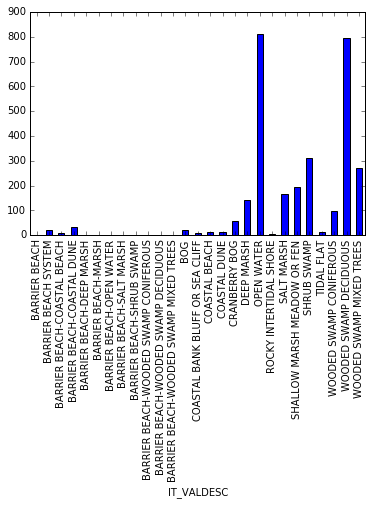

In [96]:
massdep_type = massdep.groupby(['IT_VALDESC'])
dep_sumarea = massdep_type['SHAPE_AREA'].sum()
dep_sumarea = dep_sumarea/1000000
print(dep_sumarea)
#dep_sumarea = dep_sumarea.drop(['OW']) # drop open water class
dep_sumarea.plot(kind='bar')
#plt.ylim((0, 1000000000))
#plt.tight_layout()
plt.show()

POLY_CODE
1     240.851220
2     355.975509
3    1475.317434
4      55.675879
5     164.918354
6     451.432533
7      14.232190
8      92.572263
9     121.163843
Name: SHAPE_AREA, dtype: float64


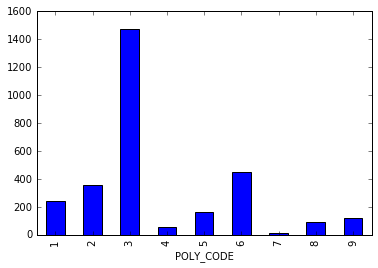

In [97]:
massdep_type = massdep.groupby(['POLY_CODE'])
dep_sumarea = massdep_type['SHAPE_AREA'].sum()
#dep_sumarea = dep_sumarea.drop(['OW']) # drop open water class
dep_sumarea = dep_sumarea/1000000
drop = ['Estuarine and Marine Deepwater', 'Estuarine and Marine Wetland']
nwi_ma_sumarea = nwi_ma_sumarea.drop(drop) # drop marine classes
print(dep_sumarea)
dep_sumarea.plot(kind='bar')
#plt.ylim((0, 1000000000))
plt.show()

In [98]:
['RESERVOIR', 'MARSH', 'WOODED SWAMP', 'CRANBERRY BOG',
                    'SALT MARSH', 'OPEN WATER', 'TIDAL FLAT/ROCKY SHORE', 'BEACH/DUNES',
                    'OPEN WATER TIDAL', 'OPEN WATER OCEAN']

['RESERVOIR',
 'MARSH',
 'WOODED SWAMP',
 'CRANBERRY BOG',
 'SALT MARSH',
 'OPEN WATER',
 'TIDAL FLAT/ROCKY SHORE',
 'BEACH/DUNES',
 'OPEN WATER TIDAL',
 'OPEN WATER OCEAN']

NWI - MassGIS
WET_TYPE
Freshwater Emergent Wetland           192.918303
Freshwater Forested/Shrub Wetland    1752.384291
Freshwater Pond                       135.660501
Lake                                  587.796086
Other                                   1.889727
Riverine                              101.517866
Name: SHAPE_AREA, dtype: float64

NWI - Updated
WETLAND_TY
Freshwater Emergent Wetland           397.633165
Freshwater Forested/Shrub Wetland    1621.048952
Freshwater Pond                       130.912419
Lake                                  566.924451
Other                                  19.029246
Riverine                              119.380435
Name: SHAPE_Area, dtype: float64


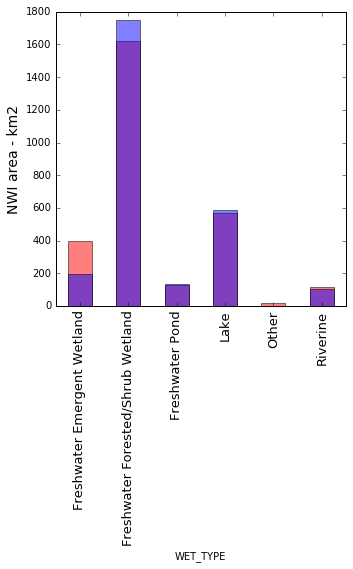

In [137]:
plt.figure(figsize=(5,8),facecolor='w', edgecolor='k')
nwi_ma_type = nwi_ma.groupby(['WET_TYPE'])
nwi_ma_sumarea = nwi_ma_type['SHAPE_AREA'].sum()
nwi_ma_sumarea = nwi_ma_sumarea/1000000
drop = ['Estuarine and Marine Deepwater', 'Estuarine and Marine Wetland']
nwi_ma_sumarea = nwi_ma_sumarea.drop(drop) # drop marine classes
print('NWI - MassGIS')
print(nwi_ma_sumarea)
print('')
nwi_type = nwi.groupby(['WETLAND_TY'])
nwi_sumarea = nwi_type['SHAPE_Area'].sum()
nwi_sumarea = nwi_sumarea/1000000
nwi_sumarea = nwi_sumarea.drop(drop) # drop marine classes
print('NWI - Updated')
print(nwi_sumarea)

nwi_sumarea.plot(kind='bar', alpha=0.5, color='r')
nwi_ma_sumarea.plot(kind='bar', alpha=0.5)
plt.xticks(fontsize=13)
plt.ylabel('NWI area - km2', fontsize=14)
plt.tight_layout()
plt.show()
